In [236]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [237]:
data = pd.read_csv('Cleared Sheet.csv')

In [238]:
data

,Unnamed: 0,Name,Sex,Age (in years),A. Lockdown zone category (As o,Total time Spent on Social Medi,1,2,3,Not Listed App that you Use?,...,Not Listed News Portal that you,J. Do yo exercise during lockdo,K. How many Times do you exerci,L. What type of exercise method,M. Do you use Health/Wellness A,O. Are you missing online shopp,P. Any new skills acquired duri,Name any new habits or lifestyl,Recoded H. How much time do you,Recoded E. Time Spent on Video
0,22:43.0,Abhinaya,Female,21-30,Green,1,WhatsApp,Facebook,Not Listed,YouTube,...,NaN,Yes,3-5 days/week,Home Workout,No,No,Yes,Homemade crafts,30,1
1,01:52.9,Bhavesh Shetye,Male,21-30,Red,1,Facebook,WhatsApp,Twitter,NaN,...,NaN,Yes,3-5 days/week,Walking,No,Yes,No,NaN,30,1
2,56:41.9,Doris D'souza,Female,21-30,Red,1,Facebook,WhatsApp,Instagram,Na,...,Na,No,1-3 days/week,Home Workout,No,No,No,Cooking,30,1
3,28:36.0,Ivy D'silva,Female,21-30,Green,1,Instagram,WhatsApp,Facebook,"Whatsapp, instagram and facebook",...,"Time's of India, hearld",Yes,1-3 days/week,Walking,No,Yes,No,Cooking new recepies,30,1
4,31:40.8,Karan Mhalsekar,Male,21-30,Orange,1,WhatsApp,NaN,NaN,NaN,...,NaN,No,NaN,NaN,No,No,No,NaN,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,45:07.4,Shachi Agarwal,Female,21-30,Red,6,Instagram,WhatsApp,Not Listed,PagalGuy,...,NaN,No,1-3 days/week,NaN,No,No,Yes,"reading, guitar",70,6
582,03:02.8,Diksha,Female,21-30,Red,6,WhatsApp,Instagram,Facebook,Netflix,...,NaN,Yes,1-3 days/week,Home Workout,No,Yes,Yes,NaN,70,8
583,11:06.7,John Cena,Male,31-40,Green,6,Facebook,WhatsApp,Twitter,NaN,...,NaN,Yes,6-7 days/week,Home Workout,Yes,Yes,Yes,NaN,70,8
584,31:07.3,Uny yby,Male,21-30,Orange,6,WhatsApp,Instagram,WeChat,NaN,...,NaN,Yes,1-3 days/week,Walking,No,No,No,NaN,70,8


In [239]:
selected_data = data[['Total time Spent on Social Medi','Recoded H. How much time do you','Recoded E. Time Spent on Video']]

In [240]:
selected_data = selected_data.fillna(0)

In [241]:
# Calculate the cosine similarity matrix
cosine_sim_matrix = cosine_similarity(selected_data)
# Print or save the cosine similarity matrix as needed
print(cosine_sim_matrix)

[[1.         1.         1.         ... 0.99544372 0.99544372 0.99845778]
 [1.         1.         1.         ... 0.99544372 0.99544372 0.99845778]
 [1.         1.         1.         ... 0.99544372 0.99544372 0.99845778]
 ...
 [0.99544372 0.99544372 0.99544372 ... 1.         1.         0.99508893]
 [0.99544372 0.99544372 0.99544372 ... 1.         1.         0.99508893]
 [0.99845778 0.99845778 0.99845778 ... 0.99508893 0.99508893 1.        ]]


In [242]:
vector1 = np.array(data[['Total time Spent on Social Medi']])
vector2 = np.array(data[['Recoded E. Time Spent on Video']])

In [243]:
dot_product = np.dot(vector1,vector2, out=None)

ValueError: shapes (586,1) and (586,1) not aligned: 1 (dim 1) != 586 (dim 0)

In [244]:
n12 = np.squeeze(vector1)

X12 = np.squeeze(vector2)


In [245]:
dot = np.dot(n12,X12)

In [246]:
norm1 = np.linalg.norm(vector1)
norm2 = np.linalg.norm(vector2)

In [247]:
cosine_similarity = dot / (norm1 * norm2)

In [248]:
print("Cosine Similarity:",
cosine_similarity)

Cosine Similarity: 0.848165162134791


Text(0.5, 1.0, 'Cosine Similarity between TSM and TVSM')

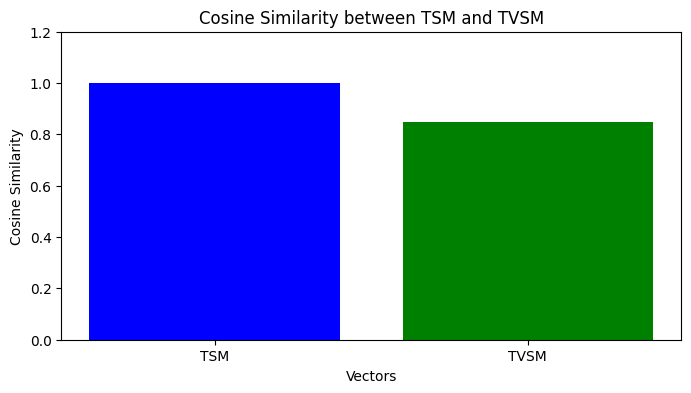

In [249]:
# Plotting
plt.figure(figsize=(8, 4))
plt.bar(['TSM', 'TVSM'], [1, cosine_similarity], color=['blue', 'green'])
plt.ylim(0, 1.2)  # Set y-axis limits

plt.xlabel('Vectors')
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity between TSM and TVSM')

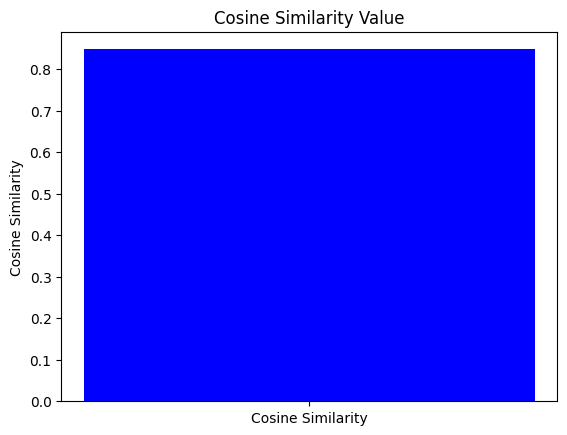

In [187]:
plt.bar(['Cosine Similarity'], [cosine_similarity], color=['blue'])

# Adding labels and title
plt.ylabel('Cosine Similarity')
plt.title('Cosine Similarity Value')

# Display the plot
plt.show()

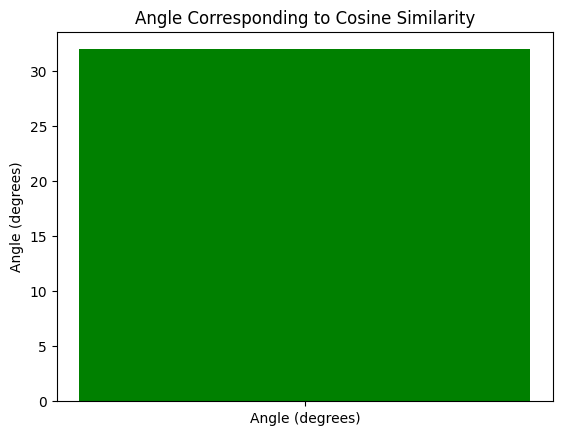

In [188]:
angle_radians = np.arccos(cosine_similarity)

# Convert the angle to degrees
angle_degrees = np.degrees(angle_radians)

# Plotting
plt.bar(['Angle (degrees)'], [angle_degrees], color=['green'])

# Adding labels and title
plt.ylabel('Angle (degrees)')
plt.title('Angle Corresponding to Cosine Similarity')

# Display the plot
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'Arc'

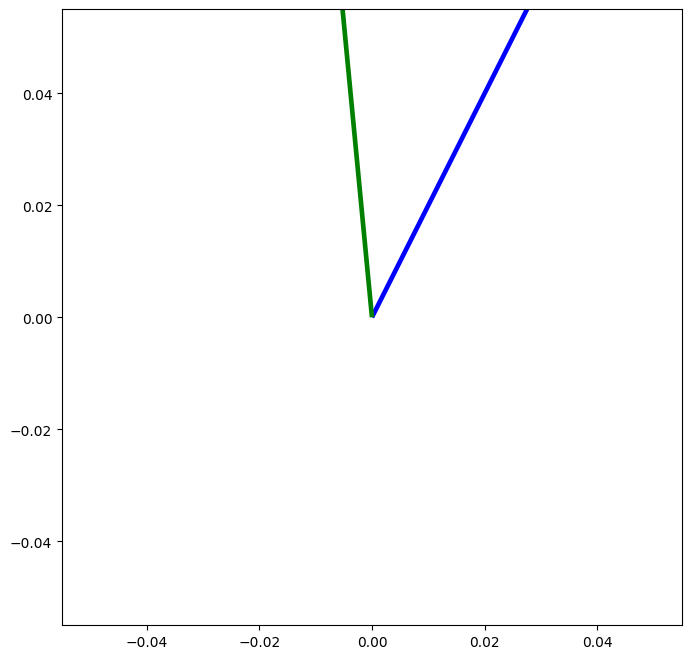

In [189]:
# Assume vector1 is [1, 2] for simplicity
vector1 = np.array([1, 2])

# Calculate the angle in radians
angle_radians = np.arccos(cosine_similarity)

# Convert the angle to degrees
angle_degrees = np.degrees(angle_radians)

# Assume vector2 is obtained by rotating vector1 by the calculated angle
rotation_matrix = np.array([[np.cos(angle_radians), -np.sin(angle_radians)],
                            [np.sin(angle_radians), np.cos(angle_radians)]])
vector2 = np.dot(rotation_matrix, vector1)

# Plotting
plt.figure(figsize=(8, 8))

# Plot vectors
plt.quiver(0, 0, vector1[0], vector1[1], angles='xy', scale_units='xy', scale=1, color='blue', label='Vector 1')
plt.quiver(0, 0, vector2[0], vector2[1], angles='xy', scale_units='xy', scale=1, color='green', label='Vector 2')

# Plot angle arc
angle_patch = plt.Arc((0, 0), 1, 1, theta1=0, theta2=angle_degrees, color='red', label='Angle')
plt.gca().add_patch(angle_patch)

# Adding labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Vectors and Angle')

# Set equal scaling for better visualization
plt.axis('equal')

# Display the legend
plt.legend()

# Display the plot
plt.show()


In [190]:
column1_values = data['Total time Spent on Social Medi'].values
column2_values = data['Recoded E. Time Spent on Video'].values

In [191]:

# Calculate the Euclidean distance
euclidean_distance = np.linalg.norm(column1_values - column2_values)

print(f'Euclidean distance between Total time Spent on Social Medi and Recoded E. Time Spent on Video : {euclidean_distance}')

Euclidean distance between Total time Spent on Social Medi and Recoded E. Time Spent on Video : 52.72570530585627


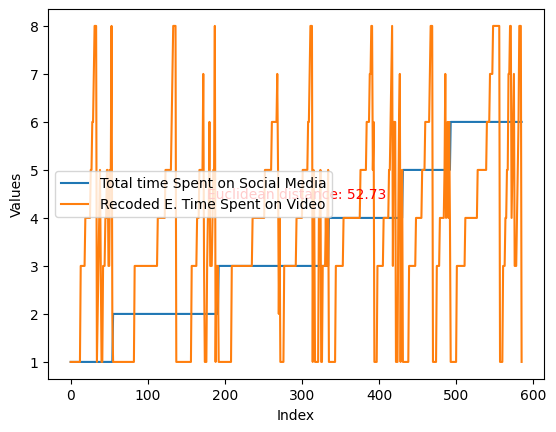

In [192]:
# Plot the two columns
plt.plot(column1_values, label='Total time Spent on Social Media')
plt.plot(column2_values, label='Recoded E. Time Spent on Video')

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()

# Display the Euclidean distance as a text annotation
plt.annotate(f'Euclidean distance: {euclidean_distance:.2f}', 
             xy=(0.5, 0.5), xycoords='axes fraction',
             ha='center', va='center', fontsize=10, color='red')

# Show the plot
plt.show()

In [193]:
vector1 = np.array(data[['Total time Spent on Social Medi']])
vector2 = np.array(data[['Recoded E. Time Spent on Video']])

n12 = np.squeeze(vector1.values)

X12 = np.squeeze(vector2.values)

dot = np.dot(n12,X12)

norm1 = np.linalg.norm(vector1.values)
norm2 = np.linalg.norm(vector2.values)

# Calculate the Euclidean distance on the normalized columns
euclidean_distance = np.linalg.norm(column1_values_normalized - column2_values_normalized)

# Plot the normalized columns
plt.plot(column1_values_normalized )
plt.plot(column2_values_normalized )

# Add labels and legend
plt.xlabel('Index')
plt.ylabel('Normalized Values')
plt.legend()

# Display the Euclidean distance as a text annotation
plt.annotate(f'Euclidean distance: {euclidean_distance:.2f}', 
             xy=(0.5, 0.5), xycoords='axes fraction',
             ha='center', va='center', fontsize=10, color='red')

# Show the plot
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [194]:
norm1

91.23595782365635

In [195]:
norm2

98.45811292118086

In [196]:
data.head()

,Unnamed: 0,Name,Sex,Age (in years),A. Lockdown zone category (As o,Total time Spent on Social Medi,1,2,3,Not Listed App that you Use?,...,Not Listed News Portal that you,J. Do yo exercise during lockdo,K. How many Times do you exerci,L. What type of exercise method,M. Do you use Health/Wellness A,O. Are you missing online shopp,P. Any new skills acquired duri,Name any new habits or lifestyl,Recoded H. How much time do you,Recoded E. Time Spent on Video
0,22:43.0,Abhinaya,Female,21-30,Green,1,WhatsApp,Facebook,Not Listed,YouTube,...,NaN,Yes,3-5 days/week,Home Workout,No,No,Yes,Homemade crafts,30,1
1,01:52.9,Bhavesh Shetye,Male,21-30,Red,1,Facebook,WhatsApp,Twitter,NaN,...,NaN,Yes,3-5 days/week,Walking,No,Yes,No,NaN,30,1
2,56:41.9,Doris D'souza,Female,21-30,Red,1,Facebook,WhatsApp,Instagram,Na,...,Na,No,1-3 days/week,Home Workout,No,No,No,Cooking,30,1
3,28:36.0,Ivy D'silva,Female,21-30,Green,1,Instagram,WhatsApp,Facebook,"Whatsapp, instagram and facebook",...,"Time's of India, hearld",Yes,1-3 days/week,Walking,No,Yes,No,Cooking new recepies,30,1
4,31:40.8,Karan Mhalsekar,Male,21-30,Orange,1,WhatsApp,NaN,NaN,NaN,...,NaN,No,NaN,NaN,No,No,No,NaN,30,1


In [197]:
data.columns

Index(['Unnamed: 0', 'Name', 'Sex', 'Age (in years)',
       'A. Lockdown zone category (As o', 'Total time Spent on Social Medi',
       '1', '2', '3', 'Not Listed App that you Use?',
       'E. Time Spent on Video Streamin', '1._1', '2._1', '3._1',
       'G. Do you read the news online?', 'H. How much time do you spend r',
       '1._2', '2._2', '3._2', 'Not Listed News Portal that you',
       'J. Do yo exercise during lockdo', 'K. How many Times do you exerci',
       'L. What type of exercise method', 'M. Do you use Health/Wellness A',
       'O. Are you missing online shopp', 'P. Any new skills acquired duri',
       'Name any new habits or lifestyl', 'Recoded H. How much time do you',
       'Recoded E. Time Spent on Video'],
      dtype='object')

In [198]:
data.rename(columns = {'Age (in years)':'Age',
                       'A. Lockdown zone category (As o':'Zone',
                      'Total time Spent on Social Medi':'TSM',
                      'Not Listed App that you Use?':'OthersSM',
                      'Recoded E. Time Spent on Video':'TVSM',
                      'Recoded H. How much time do you':'TNSM',
                      'K. How many Times do you exerci':'TEX'}, inplace = True)

In [199]:
data.columns

Index(['Unnamed: 0', 'Name', 'Sex', 'Age', 'Zone', 'TSM', '1', '2', '3',
       'OthersSM', 'E. Time Spent on Video Streamin', '1._1', '2._1', '3._1',
       'G. Do you read the news online?', 'H. How much time do you spend r',
       '1._2', '2._2', '3._2', 'Not Listed News Portal that you',
       'J. Do yo exercise during lockdo', 'TEX',
       'L. What type of exercise method', 'M. Do you use Health/Wellness A',
       'O. Are you missing online shopp', 'P. Any new skills acquired duri',
       'Name any new habits or lifestyl', 'TNSM', 'TVSM'],
      dtype='object')

In [200]:
data.drop(['E. Time Spent on Video Streamin',
           'G. Do you read the news online?',
          'H. How much time do you spend r',
           'L. What type of exercise method',
           'M. Do you use Health/Wellness A',
           'O. Are you missing online shopp',
           'P. Any new skills acquired duri',
           'Name any new habits or lifestyl'], axis=1)

,Unnamed: 0,Name,Sex,Age,Zone,TSM,1,2,3,OthersSM,...,2._1,3._1,1._2,2._2,3._2,Not Listed News Portal that you,J. Do yo exercise during lockdo,TEX,TNSM,TVSM
0,22:43.0,Abhinaya,Female,21-30,Green,1,WhatsApp,Facebook,Not Listed,YouTube,...,NaN,NaN,Times of India,DailyHunt,NaN,NaN,Yes,3-5 days/week,30,1
1,01:52.9,Bhavesh Shetye,Male,21-30,Red,1,Facebook,WhatsApp,Twitter,NaN,...,Amazon Prime,JioTV,Times of India,NDTV,Not Listed,NaN,Yes,3-5 days/week,30,1
2,56:41.9,Doris D'souza,Female,21-30,Red,1,Facebook,WhatsApp,Instagram,Na,...,YouTube,Hotstar,Times of India,NDTV,Economic Times,Na,No,1-3 days/week,30,1
3,28:36.0,Ivy D'silva,Female,21-30,Green,1,Instagram,WhatsApp,Facebook,"Whatsapp, instagram and facebook",...,YouTube,NaN,Times of India,Not Listed,NaN,"Time's of India, hearld",Yes,1-3 days/week,30,1
4,31:40.8,Karan Mhalsekar,Male,21-30,Orange,1,WhatsApp,NaN,NaN,NaN,...,Hotstar,NaN,Economic Times,NaN,NaN,NaN,No,NaN,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,45:07.4,Shachi Agarwal,Female,21-30,Red,6,Instagram,WhatsApp,Not Listed,PagalGuy,...,Amazon Prime,Youtube,Economic Times,Hindustan Times,NaN,NaN,No,1-3 days/week,70,6
582,03:02.8,Diksha,Female,21-30,Red,6,WhatsApp,Instagram,Facebook,Netflix,...,Amazon Prime,Hotstar,Times of India,The Hindu,Inshorts,NaN,Yes,1-3 days/week,70,8
583,11:06.7,John Cena,Male,31-40,Green,6,Facebook,WhatsApp,Twitter,NaN,...,Amazon Prime,Hotstar,NDTV,The Hindu,Times of India,NaN,Yes,6-7 days/week,70,8
584,31:07.3,Uny yby,Male,21-30,Orange,6,WhatsApp,Instagram,WeChat,NaN,...,Hotstar,NaN,NaN,DailyHunt,Not Listed,NaN,Yes,1-3 days/week,70,8


In [201]:
data.columns

Index(['Unnamed: 0', 'Name', 'Sex', 'Age', 'Zone', 'TSM', '1', '2', '3',
       'OthersSM', 'E. Time Spent on Video Streamin', '1._1', '2._1', '3._1',
       'G. Do you read the news online?', 'H. How much time do you spend r',
       '1._2', '2._2', '3._2', 'Not Listed News Portal that you',
       'J. Do yo exercise during lockdo', 'TEX',
       'L. What type of exercise method', 'M. Do you use Health/Wellness A',
       'O. Are you missing online shopp', 'P. Any new skills acquired duri',
       'Name any new habits or lifestyl', 'TNSM', 'TVSM'],
      dtype='object')

In [202]:
data.head()

,Unnamed: 0,Name,Sex,Age,Zone,TSM,1,2,3,OthersSM,...,Not Listed News Portal that you,J. Do yo exercise during lockdo,TEX,L. What type of exercise method,M. Do you use Health/Wellness A,O. Are you missing online shopp,P. Any new skills acquired duri,Name any new habits or lifestyl,TNSM,TVSM
0,22:43.0,Abhinaya,Female,21-30,Green,1,WhatsApp,Facebook,Not Listed,YouTube,...,NaN,Yes,3-5 days/week,Home Workout,No,No,Yes,Homemade crafts,30,1
1,01:52.9,Bhavesh Shetye,Male,21-30,Red,1,Facebook,WhatsApp,Twitter,NaN,...,NaN,Yes,3-5 days/week,Walking,No,Yes,No,NaN,30,1
2,56:41.9,Doris D'souza,Female,21-30,Red,1,Facebook,WhatsApp,Instagram,Na,...,Na,No,1-3 days/week,Home Workout,No,No,No,Cooking,30,1
3,28:36.0,Ivy D'silva,Female,21-30,Green,1,Instagram,WhatsApp,Facebook,"Whatsapp, instagram and facebook",...,"Time's of India, hearld",Yes,1-3 days/week,Walking,No,Yes,No,Cooking new recepies,30,1
4,31:40.8,Karan Mhalsekar,Male,21-30,Orange,1,WhatsApp,NaN,NaN,NaN,...,NaN,No,NaN,NaN,No,No,No,NaN,30,1


In [203]:
data.columns

Index(['Unnamed: 0', 'Name', 'Sex', 'Age', 'Zone', 'TSM', '1', '2', '3',
       'OthersSM', 'E. Time Spent on Video Streamin', '1._1', '2._1', '3._1',
       'G. Do you read the news online?', 'H. How much time do you spend r',
       '1._2', '2._2', '3._2', 'Not Listed News Portal that you',
       'J. Do yo exercise during lockdo', 'TEX',
       'L. What type of exercise method', 'M. Do you use Health/Wellness A',
       'O. Are you missing online shopp', 'P. Any new skills acquired duri',
       'Name any new habits or lifestyl', 'TNSM', 'TVSM'],
      dtype='object')

In [206]:
l3 = LabelEncoder()
label = l3.fit_transform(data["Sex"])
Data = data.drop("Sex", axis='columns')
Data["Sex"] = label

In [208]:
Data

,Unnamed: 0,Name,Age,Zone,TSM,1,2,3,OthersSM,E. Time Spent on Video Streamin,...,J. Do yo exercise during lockdo,TEX,L. What type of exercise method,M. Do you use Health/Wellness A,O. Are you missing online shopp,P. Any new skills acquired duri,Name any new habits or lifestyl,TNSM,TVSM,Sex
0,22:43.0,Abhinaya,21-30,Green,1,WhatsApp,Facebook,Not Listed,YouTube,0 Hr - 1 Hr,...,Yes,3-5 days/week,Home Workout,No,No,Yes,Homemade crafts,30,1,0
1,01:52.9,Bhavesh Shetye,21-30,Red,1,Facebook,WhatsApp,Twitter,NaN,0 Hr - 1 Hr,...,Yes,3-5 days/week,Walking,No,Yes,No,NaN,30,1,1
2,56:41.9,Doris D'souza,21-30,Red,1,Facebook,WhatsApp,Instagram,Na,0 Hr - 1 Hr,...,No,1-3 days/week,Home Workout,No,No,No,Cooking,30,1,0
3,28:36.0,Ivy D'silva,21-30,Green,1,Instagram,WhatsApp,Facebook,"Whatsapp, instagram and facebook",0 Hr - 1 Hr,...,Yes,1-3 days/week,Walking,No,Yes,No,Cooking new recepies,30,1,0
4,31:40.8,Karan Mhalsekar,21-30,Orange,1,WhatsApp,NaN,NaN,NaN,0 Hr - 1 Hr,...,No,NaN,NaN,No,No,No,NaN,30,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,45:07.4,Shachi Agarwal,21-30,Red,6,Instagram,WhatsApp,Not Listed,PagalGuy,4 Hrs - 5 Hrs,...,No,1-3 days/week,NaN,No,No,Yes,"reading, guitar",70,6,0
582,03:02.8,Diksha,21-30,Red,6,WhatsApp,Instagram,Facebook,Netflix,6 Hrs +,...,Yes,1-3 days/week,Home Workout,No,Yes,Yes,NaN,70,8,0
583,11:06.7,John Cena,31-40,Green,6,Facebook,WhatsApp,Twitter,NaN,6 Hrs +,...,Yes,6-7 days/week,Home Workout,Yes,Yes,Yes,NaN,70,8,1
584,31:07.3,Uny yby,21-30,Orange,6,WhatsApp,Instagram,WeChat,NaN,6 Hrs +,...,Yes,1-3 days/week,Walking,No,No,No,NaN,70,8,1


In [209]:
x_data = Data[[
    'TSM', 'TVSM', 'TNSM'
]]
y_data = Data["Sex"]

In [210]:
x_data.head(2)

,TSM,TVSM,TNSM
0,1,1,30
1,1,1,30


In [214]:
scalar = MinMaxScaler()
scalar.fit(x_data)
new_data = scalar.transform(x_data)

In [215]:
new_data

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.]])

In [216]:
new_data.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [217]:
euclidean_distances = np.linalg.norm(new_data, axis=1)

print(euclidean_distance)

52.72570530585627


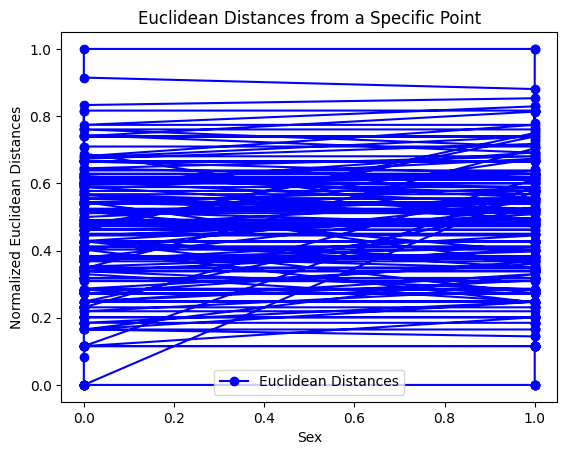

In [221]:
scaler = MinMaxScaler()
normalized_distances = scaler.fit_transform(euclidean_distances.reshape(-1, 1))

# Plot the normalized distances
plt.plot(y_data, normalized_distances, marker='o', linestyle='-', color='blue', label='Euclidean Distances')
plt.xlabel('Sex')
plt.ylabel('Normalized Euclidean Distances')
plt.title('Euclidean Distances from a Specific Point')
plt.legend()
plt.show()

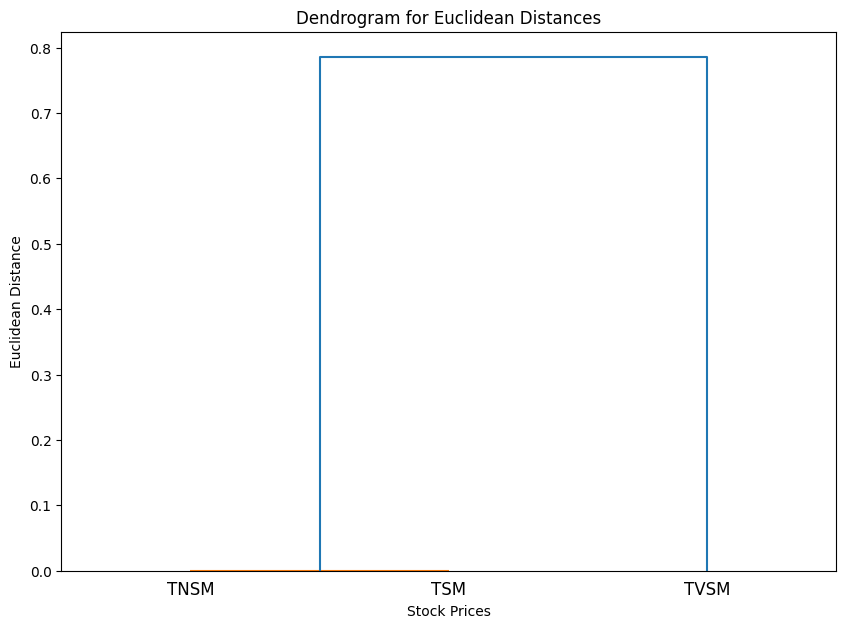

In [233]:
proximity_matrix = [
    [1.000, .000, 1.000],
    [.000, 1.000, .215],
    [1.000, .215, 1.000]
]

# Convert similarity to dissimilarity (Euclidean distance)
dissimilarity_matrix = 1 - np.array(proximity_matrix)
dissimilarity_matrix
# Perform hierarchical clustering
linked = linkage(squareform(dissimilarity_matrix), 'single')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=['TSM', 'TVSM', 'TNSM'],
           distance_sort='descending', show_leaf_counts=True)

plt.title('Dendrogram for Euclidean Distances')
plt.xlabel('Stock Prices')
plt.ylabel('Euclidean Distance')
plt.show()

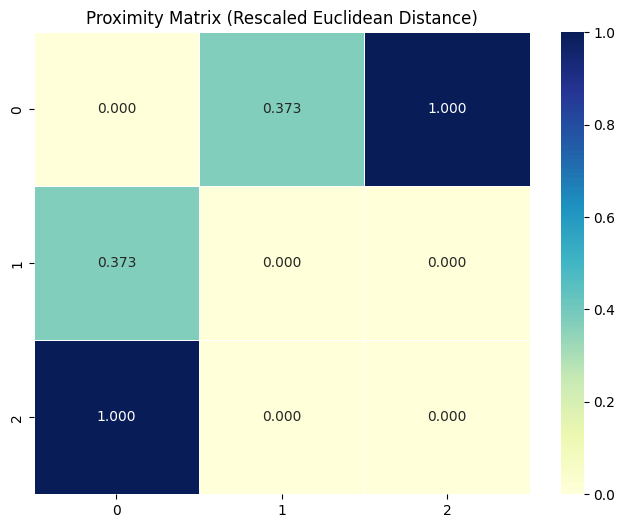

In [230]:
proximity_matrix = [
    [.000, .373, 1.000],
    [.373, .000, .000],
    [1.000,.000, .000]
]

plt.figure(figsize=(8, 6))
sns.heatmap(proximity_matrix, cmap="YlGnBu", annot=True, fmt=".3f", linewidths=.5)
plt.title('Proximity Matrix (Rescaled Euclidean Distance)')
plt.show()

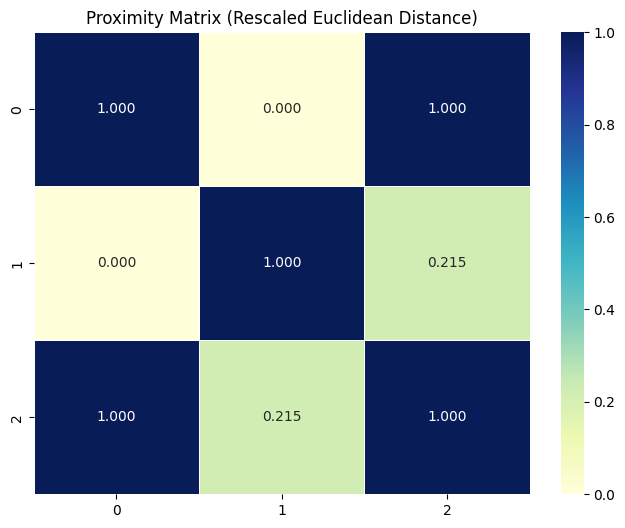

In [234]:
proximity_matrix = [
    [1.000, .000, 1.000],
    [.000, 1.000, .215],
    [1.000, .215, 1.000]
]

plt.figure(figsize=(8, 6))
sns.heatmap(proximity_matrix, cmap="YlGnBu", annot=True, fmt=".3f", linewidths=.5)
plt.title('Proximity Matrix (Rescaled Euclidean Distance)')
plt.show()